In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
# import statsmodels.stats.proportion as proportion

In [2]:
def model_comp_pvals(N, frequencies):
    pNull=np.sum(frequencies)/(np.sum(N))
    pFull=frequencies/N
    LikelyNull = np.prod(stat.binom.pmf(frequencies,N,pNull))
    LikelyFull = np.prod(stat.binom.pmf(frequencies,N,pFull))

    chi_sq = -2 * np.log(LikelyNull/LikelyFull)
#     print(chi_sq)
    return chi_sq, 1-stat.chi2.cdf(chi_sq, 3, )   #% goodness of fit for Full vs Null (whehter there are differences between conditions)

#     pEffect=[.75 .75 .75 .25];  #% power to detect three dual state and one single state (87% power with N=15)


In [3]:
single_fits = pd.read_csv('model_results/single_fit_avgsmootherror_learn_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
dual_fits = pd.read_csv('model_results/dual_fit_avgsmootherror_learn_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)


Text(0.5, 1.0, 'Dual State')

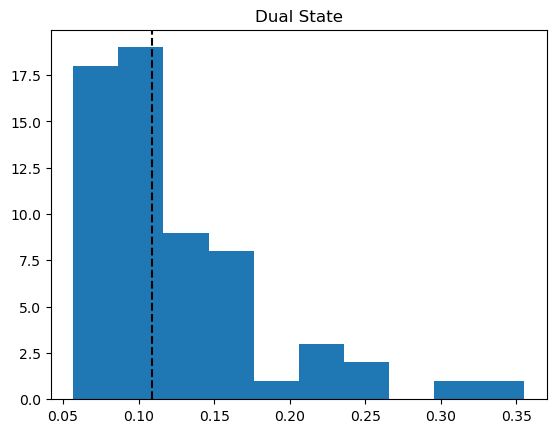

In [14]:
eps_measure = dual_fits['Eps']
plt.hist(eps_measure)
plt.axvline(x = np.median(eps_measure), ls = '--', color = 'black')
plt.title('Dual State')

,p_id,gof,A,B,Eps
0,641,-568.615785,0.996673,0.021021,0.068008
1,642,-299.740737,0.450878,0.328436,0.123934
2,643,129.453504,1.000000,0.003212,0.323033
3,644,-302.854612,0.989230,0.022957,0.123073
4,645,-360.718708,0.996467,0.012669,0.108174
...,...,...,...,...,...
57,698,-166.578332,0.997373,0.007383,0.166839
58,699,-328.295931,0.991345,0.015086,0.116273
59,700,-274.317933,0.996115,0.014185,0.131169
60,701,-472.935123,0.999706,0.009481,0.084205


In [74]:
# single_fits['AIC'] = 2*single_fits['gof']*448 + 2*2
# dual_fits['AIC'] = 2*dual_fits['gof']*448 + 2*4

# single_fits['BIC'] = 2*single_fits['gof']*448 + np.log(64*7)*2
# dual_fits['BIC'] = 2*dual_fits['gof']*448 + np.log(64*7)*4


single_fits['AIC'] = 2*single_fits['gof'] + 2*2
dual_fits['AIC'] = 2*dual_fits['gof'] + 2*4

single_fits['BIC'] = 2*single_fits['gof'] + np.log(64*7)*2
dual_fits['BIC'] = 2*dual_fits['gof'] + np.log(64*7)*4

In [33]:
single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [51]:
dual_fits

,p_id,gof,As,Bs,Af,Bf,Eps,AIC,BIC,Rotation,Emphasis
0,641,-582.312166,0.998290,0.014782,0.897008,0.054225,0.065956,-1156.624332,-1140.205159,Gradual,Accuracy
1,642,-379.457799,1.000000,0.000820,0.210892,0.325486,0.103732,-750.915599,-734.496426,Sudden,Speed
2,643,129.453509,1.000000,0.001497,1.000000,0.001715,0.323008,266.907017,283.326190,Gradual,Speed
3,644,-507.884773,0.996847,0.007339,0.727113,0.171990,0.077878,-1007.769546,-991.350373,Sudden,Accuracy
4,645,-362.190723,0.996738,0.011608,0.000000,0.131432,0.107808,-716.381446,-699.962273,Gradual,Accuracy
...,...,...,...,...,...,...,...,...,...,...,...
57,698,-333.553408,1.000000,0.003947,0.238895,0.314688,0.114924,-659.106817,-642.687644,Sudden,Speed
58,699,-328.295907,1.000000,0.000000,0.991347,0.015083,0.116308,-648.591814,-632.172641,Gradual,Speed
59,700,-574.264233,0.998296,0.008740,0.228008,0.424547,0.067154,-1140.528466,-1124.109293,Sudden,Accuracy
60,701,-472.935110,1.000000,0.000000,0.999706,0.009481,0.084210,-937.870219,-921.451046,Gradual,Accuracy


In [52]:
single_fits[single_fits['p_id'] == 653]

,p_id,gof,A,B,Eps,AIC,BIC,Rotation,Emphasis,Condition
12,653,-403.174898,0.994407,0.018768,0.098382,-802.349796,-794.14021,Gradual,Accuracy,Gradual Accuracy


In [53]:
dual_fits[dual_fits['p_id'] == 653]

,p_id,gof,As,Bs,Af,Bf,Eps,AIC,BIC,Rotation,Emphasis
12,653,-403.521925,0.997144,0.009758,0.982025,0.013267,0.098308,-799.043851,-782.624678,Gradual,Accuracy


In [54]:
sum(dual_fits['Bs'] > dual_fits['Bf'])

0

In [56]:
single_fits['Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [57]:
single_fits.loc[single_fits['AIC'] > dual_fits['AIC'], 'Condition'].value_counts()

Sudden Speed        16
Sudden Accuracy     15
Gradual Accuracy     6
Gradual Speed        1
Name: Condition, dtype: int64

In [93]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([6, 16, 15, 1]))

(54.243607324790155, 9.955480884116241e-12)

In [58]:
single_fits.loc[single_fits['BIC'] > dual_fits['BIC'], 'Condition'].value_counts()

Sudden Speed        16
Sudden Accuracy     15
Gradual Accuracy     2
Name: Condition, dtype: int64

In [94]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([16, 2, 15, 0]))

(73.6353613893822, 6.661338147750939e-16)

In [59]:
single_fits.loc[(single_fits['gof'].values < dual_fits['gof'].values), 'Condition'].value_counts()


Gradual Speed       14
Gradual Accuracy     6
Name: Condition, dtype: int64

(array([32.,  4.,  4.,  3.,  3.,  3.,  2.,  6.,  3.,  2.]),
 array([-1.54764725e-02,  2.99807011e+01,  5.99768787e+01,  8.99730564e+01,
         1.19969234e+02,  1.49965412e+02,  1.79961589e+02,  2.09957767e+02,
         2.39953944e+02,  2.69950122e+02,  2.99946300e+02]),
 <BarContainer object of 10 artists>)

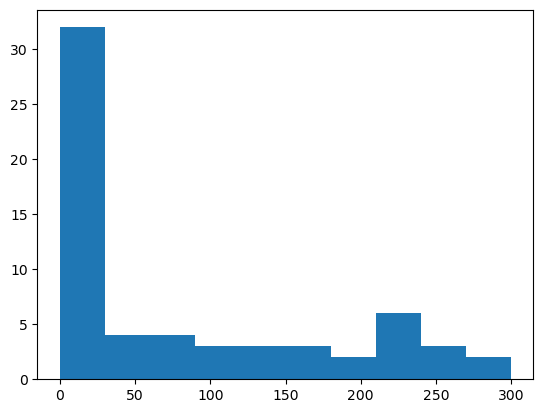

In [60]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

In [62]:
# single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*640
single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)

In [63]:
single_fits['chi2'] = stat.chi2.sf(single_fits['LR_ratio'], 2)

In [64]:
single_fits.loc[single_fits['chi2'] < 0.05, 'Condition'].value_counts()

Sudden Speed        16
Sudden Accuracy     15
Gradual Accuracy     6
Gradual Speed        1
Name: Condition, dtype: int64

In [95]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([6, 16, 15, 1]))

(54.243607324790155, 9.955480884116241e-12)

# Cross Validation Comparisons

In [65]:
single_fits = pd.read_csv('model_results/single_fit_avgsmootherror_learn_results_cv.csv')
dual_fits = pd.read_csv('model_results/dual_fit_avgsmootherror_learn_results_cv.csv')

single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [66]:
dual_fits['dual win'] = (single_fits['test gof'].values >= dual_fits['test gof'].values).astype(int)

In [67]:
def compute_wins(dual_fits):
    # Drop column: 'Unnamed: 0'
    # dual_fits = dual_fits.drop(columns=['Unnamed: 0'])
    # Performed 1 aggregation grouped on columns: 'p_id', 'Rotation' and 2 other columns
    dual_fits = dual_fits.groupby(['p_id', 'Rotation', 'Emphasis', 'dual win']).agg(dualwin_count=('dual win', 'count')).reset_index()
    # Filter rows based on column: 'dual win'
    dual_fits = dual_fits[dual_fits['dual win'] == 1]
    return dual_fits

dual_fits_wins = compute_wins(dual_fits.copy())
dual_fits_wins['Condition'] = dual_fits_wins['Rotation'] + ' ' + dual_fits_wins['Emphasis']

In [69]:
dual_fits_wins.loc[dual_fits_wins['dualwin_count'] > 57, 'Condition'].value_counts()

Sudden Speed        15
Sudden Accuracy     15
Gradual Accuracy     8
Gradual Speed        3
Name: Condition, dtype: int64

In [96]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([8, 15, 15, 3]))

(34.70769632878377, 1.4043798390872553e-07)

(array([3279.,  448.,  391.,  434.,  292.,  245.,  466.,  454.,  108.,
          83.]),
 array([-1.98949339e-01,  2.99858520e+01,  6.01706534e+01,  9.03554547e+01,
         1.20540256e+02,  1.50725057e+02,  1.80909859e+02,  2.11094660e+02,
         2.41279461e+02,  2.71464263e+02,  3.01649064e+02]),
 <BarContainer object of 10 artists>)

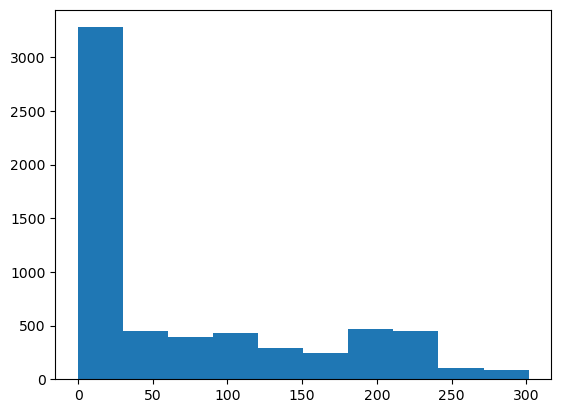

In [70]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

2/15

# Assessing Model fits visually

In [21]:
# from model_fit_functions import *
df = pd.read_csv('df_allphases.csv')
df = df.loc[((df['block'] >= 1) & (df['block'] <= 7))].reset_index().drop('index', axis = 1)
# df

In [145]:
from model_fit_functions import *
pid = 643
def model_fits(pid):
    ptype = df.loc[df['p_id'] == pid, 'Rotation'].unique()

    A = single_fits.loc[single_fits['p_id'] == pid, 'A'].values[0]
    B = single_fits.loc[single_fits['p_id'] == pid, 'B'].values[0]
    As = dual_fits.loc[dual_fits['p_id'] == pid, 'As'].values[0]
    Bs = dual_fits.loc[dual_fits['p_id'] == pid, 'Bs'].values[0]
    Af = dual_fits.loc[dual_fits['p_id'] == pid, 'Af'].values[0]
    Bf = dual_fits.loc[dual_fits['p_id'] == pid, 'Bf'].values[0]
    data = df.loc[df['p_id'] == pid, 'avg smooth errors'].values
    s = single_state_model(A, B, len(data), ptype)
    d = dual_state_model(As, Bs, Af, Bf, len(data), ptype)
    return (data, s, d)
# d, s, du = model_fits(644)
# plt.plot(d)
# plt.plot(s)
# plt.plot(du)


In [170]:
data = []
single_state = []
dual_state = []
print(len(dual_state))
for pid in df['p_id'].unique():
    ptype = df.loc[df['p_id'] == pid, 'Rotation'].unique()
    if ptype == 'Gradual':
        continue
    d, s, du = model_fits(pid)
    data.append(d)
    single_state.append(s)
    dual_state.append(du)    
    # print(len(np.ravel(dual_state)))


0


Text(0.5, 1.0, 'Dual State Predictions')

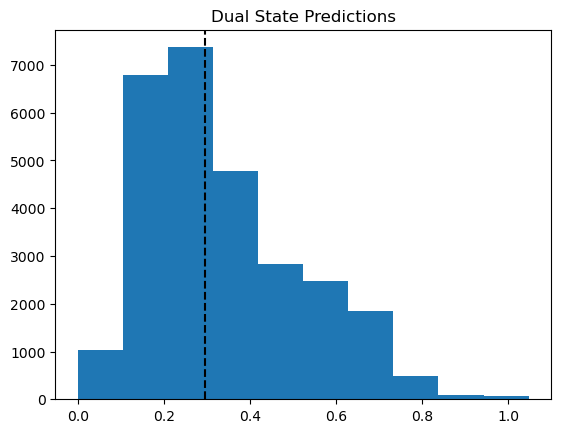

In [168]:
plt.hist(np.ravel(dual_state))
plt.axvline(x = np.median(np.ravel(dual_state)), ls = '--', color = 'black')
plt.title('Dual State Predictions')

Text(0.5, 1.0, 'Dual State Predictions')

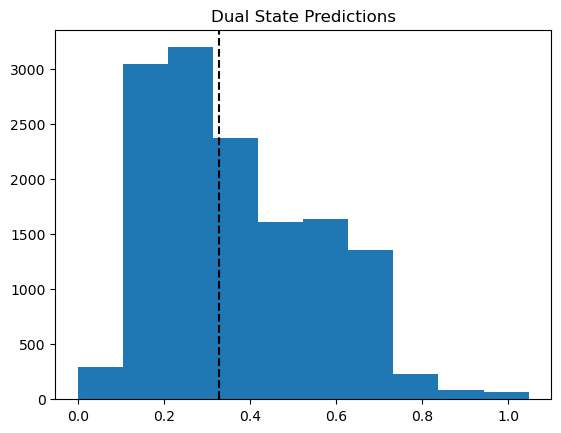

In [171]:
plt.hist(np.ravel(dual_state))
plt.axvline(x = np.median(np.ravel(dual_state)), ls = '--', color = 'black')
plt.title('Dual State Predictions')

Text(0.5, 1.0, 'Single State Predictions')

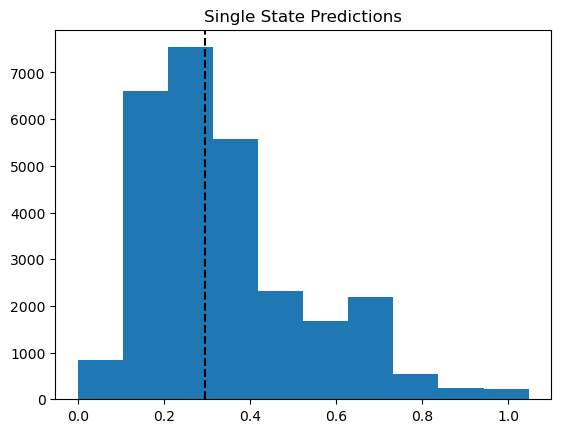

In [169]:
plt.hist(np.delete(np.ravel(single_state), np.ravel(single_state) > 1.3))
plt.axvline(x = np.median(np.ravel(single_state)), ls = '--', color = 'black')
plt.title('Single State Predictions')

Text(0.5, 1.0, 'Single State Predictions')

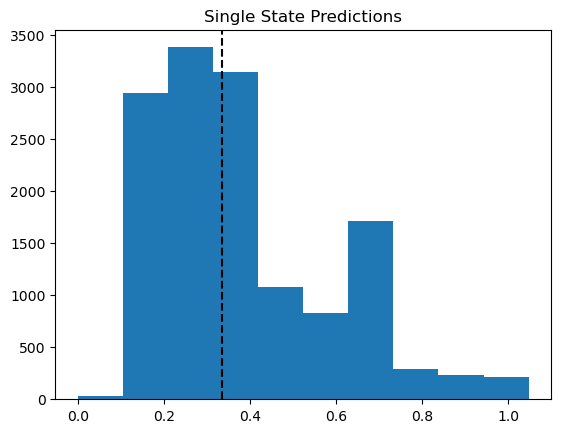

In [172]:
plt.hist(np.delete(np.ravel(single_state), np.ravel(single_state) > 1.3))
plt.axvline(x = np.median(np.ravel(single_state)), ls = '--', color = 'black')
plt.title('Single State Predictions')

(array([  31., 2944., 3381., 3147., 1080.,  825., 1714.,  287.,  236.,
         212.]),
 array([0.        , 0.10471976, 0.20943951, 0.31415927, 0.41887902,
        0.52359878, 0.62831853, 0.73303829, 0.83775804, 0.9424778 ,
        1.04719755]),
 <BarContainer object of 10 artists>)

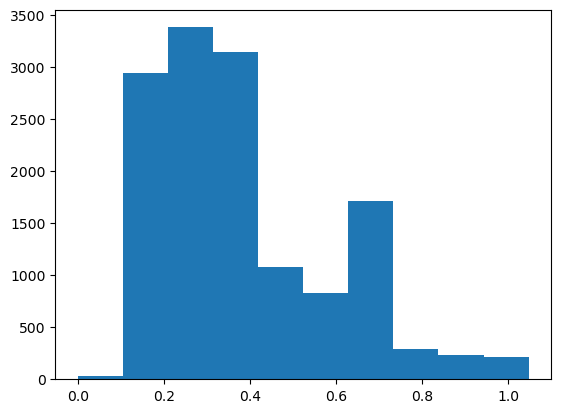

In [7]:
single_fits[single_fits.p_id == pid], dual_fits[dual_fits.p_id == pid]

(   p_id         gof         A         B       Eps
 5   646 -189.147641  0.991379  0.049439  0.158631,
    p_id         gof   As        Bs        Af        Bf       Eps
 5   646 -352.481897  1.0  0.010752  0.956345  0.065784  0.110153)

In [24]:
448*(.01)

4.48

In [ ]:
np.pi/3

1.0471975511965976

In [19]:
def calc_relearn_likelihood(params, data, model, p_type, fit_type = 'regular', train_indices = None):
    if model == 'single state':
        model_pred = single_state_model(params[0], params[1], len(data), p_type)[512:]
    else:
        model_pred = dual_state_model(params[0], params[1], params[2], params[3], len(data), p_type)[512:]

    log_lik = np.sum(stat.norm.logpdf(data[512:], model_pred, params[-1]))
    # print(params)
    return -log_lik

In [20]:
relearn_ll_ss = []
relearn_ll_ds = []

for pid in df['p_id'].unique():
    ptype = df.loc[df['p_id'] == pid, 'Rotation'].unique()

    A = single_fits.loc[single_fits['p_id'] == pid, 'A'].values[0]
    B = single_fits.loc[single_fits['p_id'] == pid, 'B'].values[0]
    Eps_ss = single_fits.loc[single_fits['p_id'] == pid, 'Eps'].values[0]

    As = dual_fits.loc[dual_fits['p_id'] == pid, 'As'].values[0]
    Bs = dual_fits.loc[dual_fits['p_id'] == pid, 'Bs'].values[0]
    Af = dual_fits.loc[dual_fits['p_id'] == pid, 'Af'].values[0]
    Bf = dual_fits.loc[dual_fits['p_id'] == pid, 'Bf'].values[0]
    Eps_ds = dual_fits.loc[dual_fits['p_id'] == pid, 'Eps'].values[0]

    data = df.loc[df['p_id'] == pid, 'avg errors'].values
    single_fits.loc[single_fits['p_id'] == pid, 'relearn_ll_ss'] = calc_relearn_likelihood([A, B, Eps_ss], data, 'single state', ptype)
    dual_fits.loc[dual_fits['p_id'] == pid, 'relearn_ll_ds'] = calc_relearn_likelihood([As, Bs, Af, Bf, Eps_ds], data, 'dual state', ptype)

    # relearn_ll_ds.append(calc_relearn_likelihood([As, Bs, Af, Bf, Eps_ss], data, 'dual state', ptype))

In [21]:
single_fits.loc[single_fits['relearn_ll_ss'] > dual_fits['relearn_ll_ds'], 'Condition'].value_counts()

Gradual Accuracy    13
Sudden Speed        10
Gradual Speed        9
Sudden Accuracy      9
Name: Condition, dtype: int64

In [92]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([13, 10, 9, 9]))

(2.3886061641791474, 0.49575910576591375)

# Learning X Retention plots

In [31]:
single_fits['A x B'] = single_fits['A'] * single_fits['B']
dual_fits['As x Bs'] = dual_fits['As'] * dual_fits['Bs']
dual_fits['Af x Bf'] = dual_fits['Af'] * dual_fits['Bf']



In [36]:
single_fits['Single State'] = single_fits['A x B']
single_fits['Fast State'] = dual_fits['Af x Bf']
single_fits['Slow State'] = dual_fits['As x Bs']
learn_times_reten = single_fits[['p_id', 'Condition', 'Single State', 'Fast State', 'Slow State']]


In [38]:
learn_times_reten['sub_avg'] = learn_times_reten[['Single State', 'Fast State', 'Slow State']].mean(axis = 1)

In [51]:
learn_times_reten['Single State'] = learn_times_reten['Single State'] - learn_times_reten['sub_avg'] + np.mean(learn_times_reten['sub_avg'].values)
learn_times_reten['Fast State'] = learn_times_reten['Fast State'] - learn_times_reten['sub_avg'] + np.mean(learn_times_reten['sub_avg'].values)
learn_times_reten['Slow State'] = learn_times_reten['Slow State'] - learn_times_reten['sub_avg'] + np.mean(learn_times_reten['sub_avg'].values)


In [52]:
learn_times_reten_melt = learn_times_reten.melt(id_vars=['p_id', 'Condition'], value_name='improvement factor', value_vars=['Single State', 'Fast State', 'Slow State'], var_name='Model')


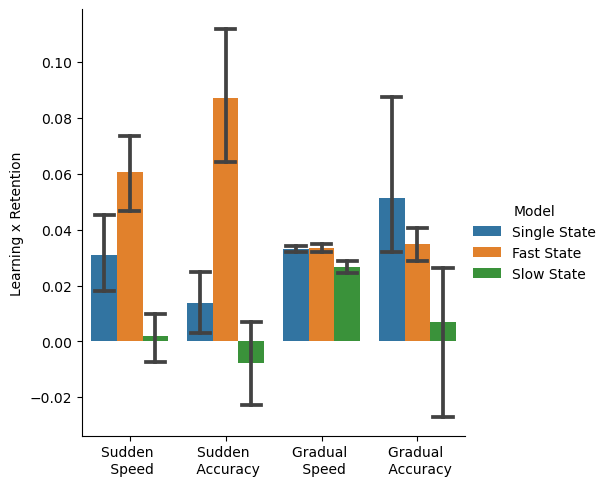

In [60]:
g = sns.catplot(x = 'Condition', y = 'improvement factor', hue = 'Model', 
            data = learn_times_reten_melt, 
            kind = 'bar', capsize = .2, order = ['Sudden Speed', 'Sudden Accuracy', 'Gradual Speed', 'Gradual Accuracy']
            )
g.set_xticklabels(['Sudden \n Speed', 'Sudden \n Accuracy', 'Gradual \n Speed', 'Gradual \n Accuracy'])
g.set_xlabels('')
g.set_ylabels('Learning x Retention')

In [75]:
oth_ss = learn_times_reten.loc[learn_times_reten['Condition'] == 'Gradual Speed', 'Slow State'].values
oth_fs = learn_times_reten.loc[learn_times_reten['Condition'] != 'Gradual Speed', 'Slow State'].values

stat.ttest_ind(oth_ss, oth_fs)

Ttest_indResult(statistic=2.427839487974701, pvalue=0.018205704440240954)